# Case1-4: 経済指標と為替、株価の相関を確認してみる

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

## 日経新聞社のサイトのExcelファイルをDataFrameへ変換
> * 日経新聞社 掲載指標ダッシュボード  
> https://vdata.nikkei.com/economicdashboard/macro/

In [2]:
# 実質GDP
try:
    gdp = pd.read_excel('https://vdata-stats-data.s3.amazonaws.com/xls/NA04Q.xls', index_col=0)
except Exception:
    gdp = pd.read_excel('data/NA04Q.xls', index_col=0)
# 景気動向指数(先行)
try:
    di = pd.read_excel('https://vdata-stats-data.s3.amazonaws.com/xls/NA21M.xls', index_col=0)
except Exception:
    di = pd.read_excel('data/NA21M.xls', index_col=0)
# 日経平均株価
try:
    n225 = pd.read_excel('https://vdata-stats-data.s3.amazonaws.com/xls/NE51M.xls', index_col=0)
except Exception:
    n225 = pd.read_excel('data/NE51M.xls', index_col=0)
# ドル円
try:
    usd_jpy = pd.read_excel('https://vdata-stats-data.s3.amazonaws.com/xls/NE11M.xls', index_col=0)
except Exception:
    usd_jpy = pd.read_excel('data/NE11M.xls', index_col=0)

## 各DataFrameを一つのDataFrameに結合

In [3]:
# 横方法に結合する場合にはaxis=1をつける
df = pd.concat([gdp.iloc[:, 0], di.iloc[:, 0], n225.iloc[:, 0], usd_jpy.iloc[:, 0]], axis=1)
df.columns = ['GDP', 'DI', 'n225', 'USD/JPY']
# nan値を削除
df.dropna(inplace=True)

## seabornで可視化

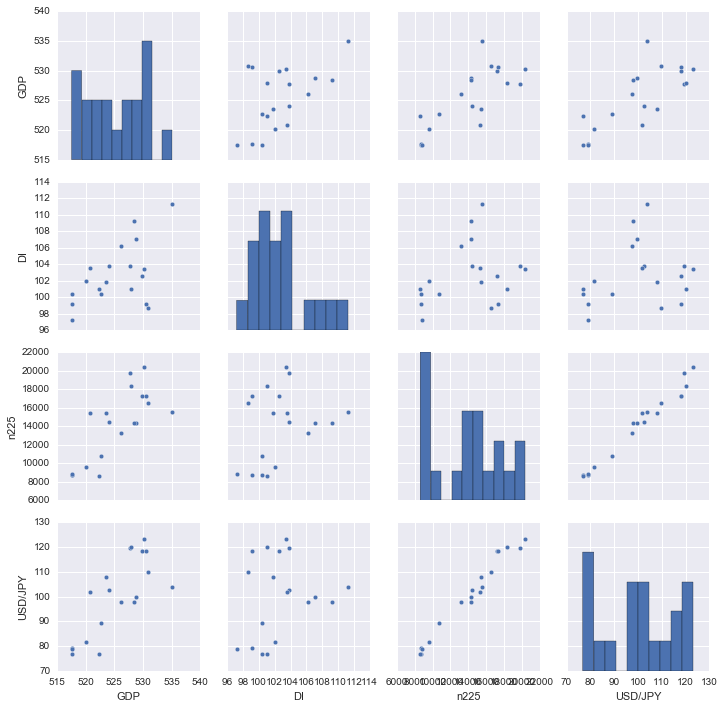

In [4]:
sns.pairplot(df)

## 相関

In [5]:
df.corr()

,GDP,DI,n225,USD/JPY
GDP,1.000000,0.529411,0.777876,0.774912
DI,0.529411,1.000000,0.290863,0.210902
n225,0.777876,0.290863,1.000000,0.985945
USD/JPY,0.774912,0.210902,0.985945,1.000000
